# CS3DP3: Differential Privacy
## Homework 2

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from unittest.mock import patch

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

adult = pd.read_csv('https://raw.githubusercontent.com/ShahabAsoodeh/3DP3/main/adult_with_pii.csv')
adult = adult.dropna()

/var/folders/3w/zzzgqpbs6rbbg69j0lrg432m0000gn/T/ipykernel_54922/2449949129.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Question 2 (a)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the  `len` of the filtered dataframe.

In [3]:
def query1():
    return adult[adult['Marital Status'] == 'Never-married'].shape[0]


query1()

9726

In [4]:
# TEST CASE for question 1
assert query1() == 9726

## Question 2 (b) 

In 2-5 sentences, answer the following:
- What is the sensitivity of `query1`, and why?

1 because it is a counting query.

## Question 2 (c) 

Use the implementation of `laplace_mech` to produce a differentially private answer to `query1`, with `epsilon = 0.1`.

In [5]:
def dp_query1(epsilon): 
    return laplace_mech(query1(), 1, epsilon)

dp_query1(0.1)

9726.177128917976

In [6]:
# TEST CASE for Question 2 (c)
dp_results = [dp_query1(0.1) for _ in range(100)]
spec = [np.random.laplace(loc=9726, scale=1/0.1) for _ in range(100)]
assert stats.wasserstein_distance(dp_results, spec) < 10

## Question 2 (d)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Implement a function `graph_error1` that:

- Calculates 1000 differentially private answers to `dp_query1`
- Calculates the percent error for each one of these answers against the original (non-private) answer
- Graphs the distribution of errors using a histogram

*Hint*: use `plt.hist(..., bins=20)`.

The given code will use your function to plot errors for `epsilon=0.1` and `epsilon=1.0`.

In [15]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

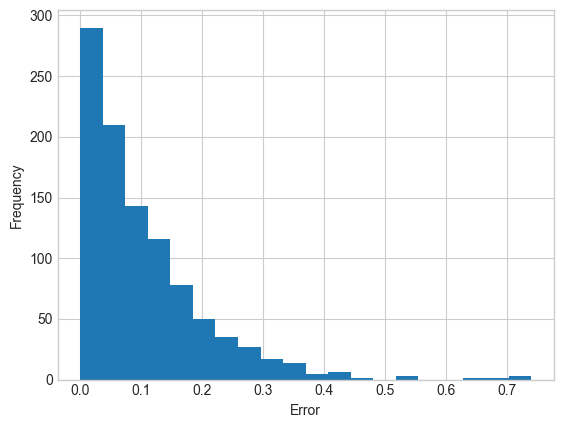

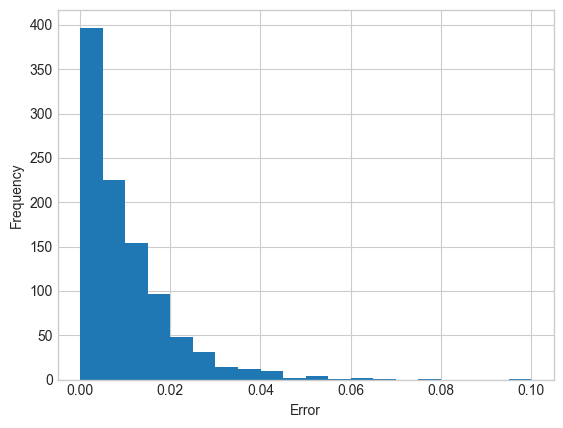

In [16]:
def graph_error1(epsilon):

    orig = query1()
    privs = [dp_query1(epsilon) for _ in range(1000)]
    errors = [pct_error(orig, priv) for priv in privs]

    plt.hist(errors, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()
graph_error1(0.1)
graph_error1(1.0)

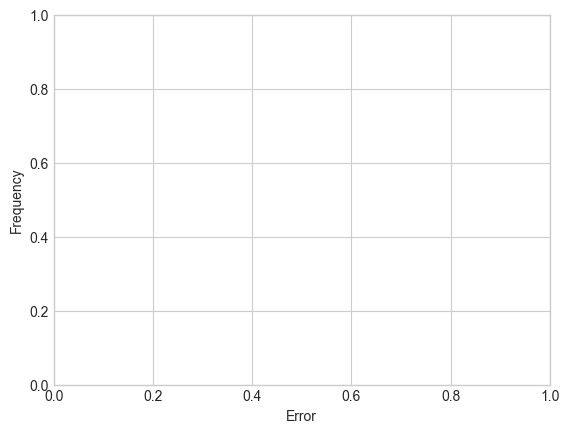

In [9]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query1()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error1(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.001

## Question 2 (e)

In 2-5 sentences, answer the following:

- How does the histogram of relative errors for $\epsilon = 0.1$ differ from the one for $\epsilon = 1.0$?
- What do the two histograms tell you about the effect of $\epsilon$ on relative error?

Answers:
- The values of relative errors are larger for smaller $\epsilon$ ($\epsilon$ = 0.1), but the error distribution is more spread out.
- higher values of $\epsilon$ indicate smaller relative errors and better accuracy and vice versa. However, the improvement in relative error and accuracy for bigger $\epsilon$ comes at the cost of privacy, since the error is more concentrated.

## Question 2 (f)

Consider `query2`, which asks how many people in the dataset are over the age of 60.

In [10]:
def query2():
    return len(adult[adult['Age'] > 60])


Implement `dp_query2`, a differentially private version of `query2` (as in Question 2 (c)), and `graph_error2`, which graphs relative error for `dp_query2` (as in question 4).

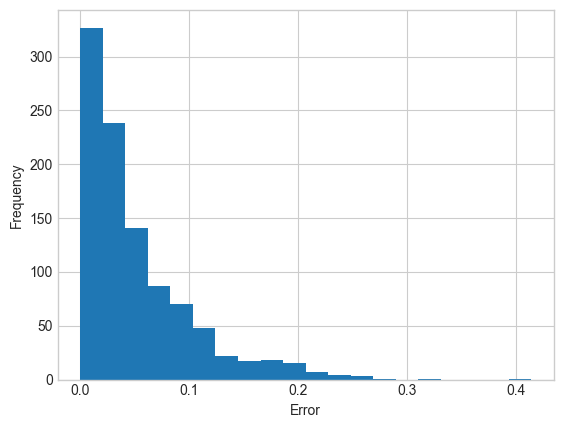

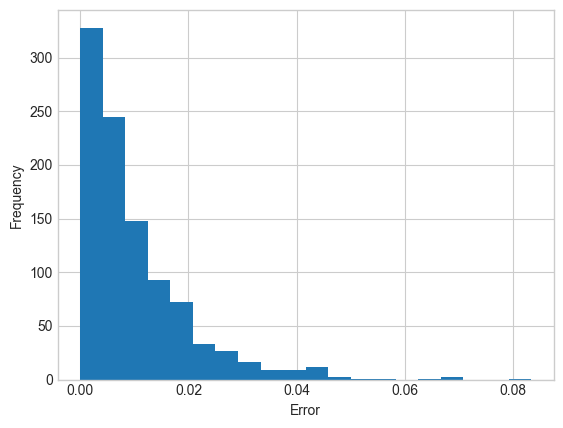

In [11]:
def dp_query2(epsilon):
    return laplace_mech(query2(), 1, epsilon)

def graph_error2(epsilon):
    orig = query2()
    privs = [dp_query2(epsilon) for _ in range(1000)]
    errors = [pct_error(orig, priv) for priv in privs]

    plt.hist(errors, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

graph_error2(1.0)
graph_error1(1.0) # we plot both errors for query 1 and query 2 at the same epsilon, to compare

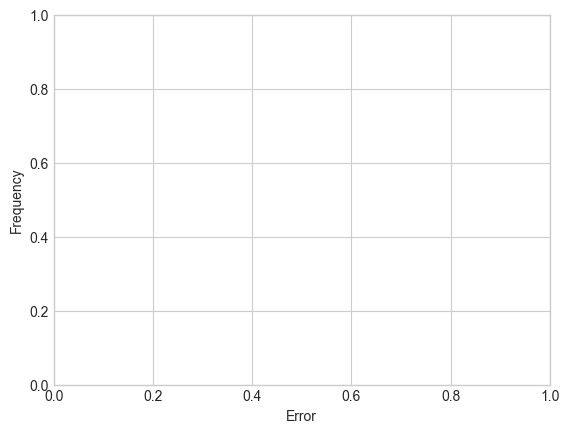

In [12]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query2()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error2(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.01

## Question 2 (g) 

In 2-5 sentences, answer the following:

- Given the graph from question 6, how does relative error differ between `dp_query1` and `dp_query2` for the same value of $\epsilon$?
- What property of the query causes the difference in relative errors between `dp_query1` and `dp_query2`?

 Answer:
 dp_query2 has larger relative errors compared to dp_query1. The sensitivity of the queries and the implementation of the laplace mechanisms cause the difference; since the two queries have the same sensitivity but vary in sizes of their results, the query with smaller original result will have bigger relative errors.